
# Assignment 5
## Part 1: Implement a Perceptron
o Given the diabetes dataset you used during Assignment 2, implement an
MLP Regressor.
## Part 2: Implement a Keras Classifier
o Given the prepared Titanic dataset from Assignment 2, implement a Keras
sequential classifier with relu activation functions.
## Assignment 5, Part 3: Implement a Keras Regressor
o Given the prepared bike-share dataset from Assignment 3, implement a
Keras sequential regressor with relu activation functions.
## Assignment 5, Part 4: Tune Your Keras Regressor
o Tune your Keras regressor from Part 3 by implementing a grid search with
different optimizers

In [107]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from sklearn import neural_network, datasets, model_selection, metrics
import sweetviz
import matplotlib.pyplot as plt
from seaborn import heatmap
from keras.wrappers.scikit_learn import KerasRegressor

Taken from: https://www.researchgate.net/post/How-to-decide-the-number-of-hidden-layers-and-nodes-in-a-hidden-layer

Thank you Somayeh Kazemi.  I will be following these rules of thumb for creating hidden layers and network sizes

There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:
1. The number of hidden neurons should be between the size of the input layer and the size of the output layer.
2. The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
3. The number of hidden neurons should be less than twice the size of the input layer.

## Part 1: Implement a Perceptron
o Given the diabetes dataset you used during Assignment 2, implement an
MLP Regressor.

The first step will be to import the data set, perform exploritory data analysis, clean the data, and then possibly standardize it.  

In [55]:
diabetes_data = datasets.load_diabetes(as_frame = True)
diabetes_target = diabetes_data["target"]
diabetes_data = diabetes_data["data"]
diabetes_data.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [56]:
diabetes_target.head(5)

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

The inital look at the data set looks good.  Sex will be our only categorical variable.  The data from sklearn seems to be pre-standardized which is less work on our part.  We will now check for missing data and either impute missing data or remove values.

In [57]:
diabetes_column_names = diabetes_data.columns
diabetes_column_names

for column in diabetes_column_names:
    print(column, sum(diabetes_data[column].isna()))

age 0
sex 0
bmi 0
bp 0
s1 0
s2 0
s3 0
s4 0
s5 0
s6 0


Great!  We have no missing data, let us look at the distribution and correlation for each feature and see if there is anything we need to drop.  We will use sweet viz to do our exploritory data analysis.

In [58]:
diabetes_report = sweetviz.DataframeReport(diabetes_data)


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



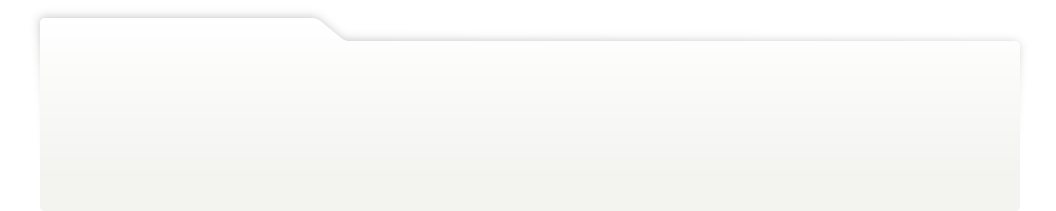
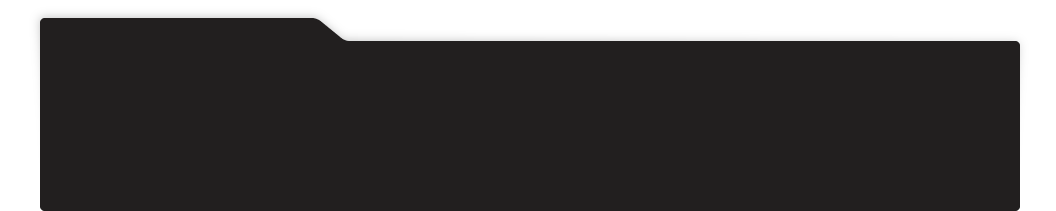
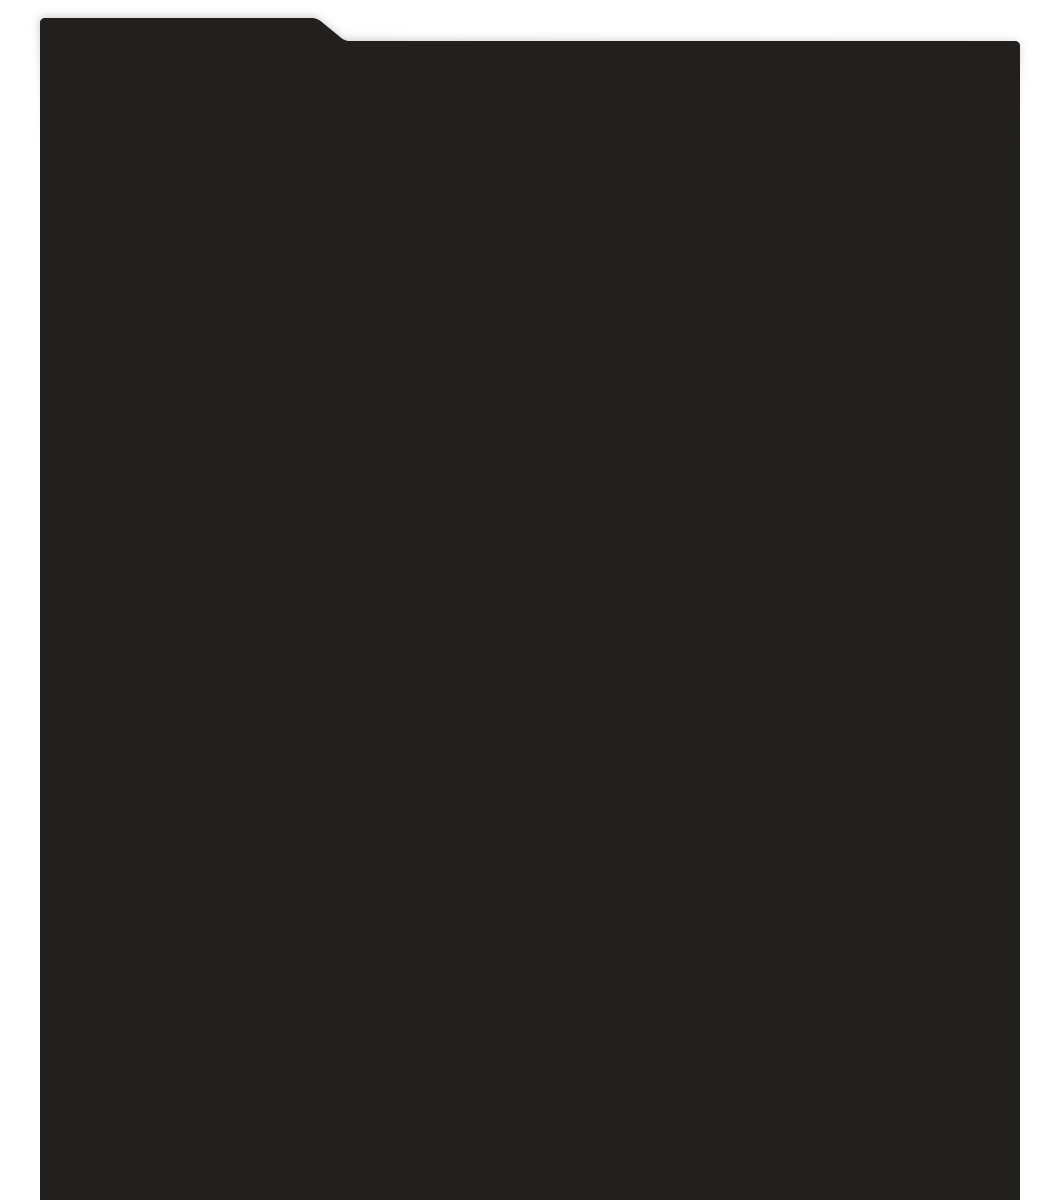
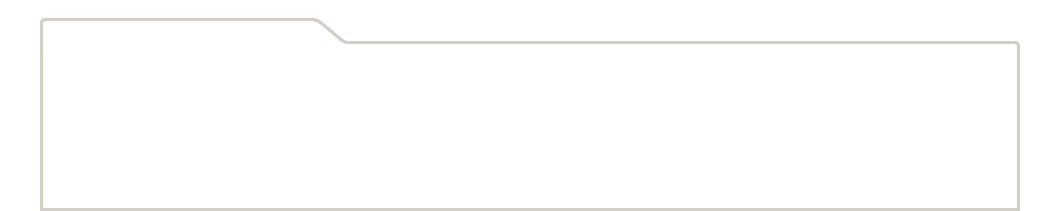
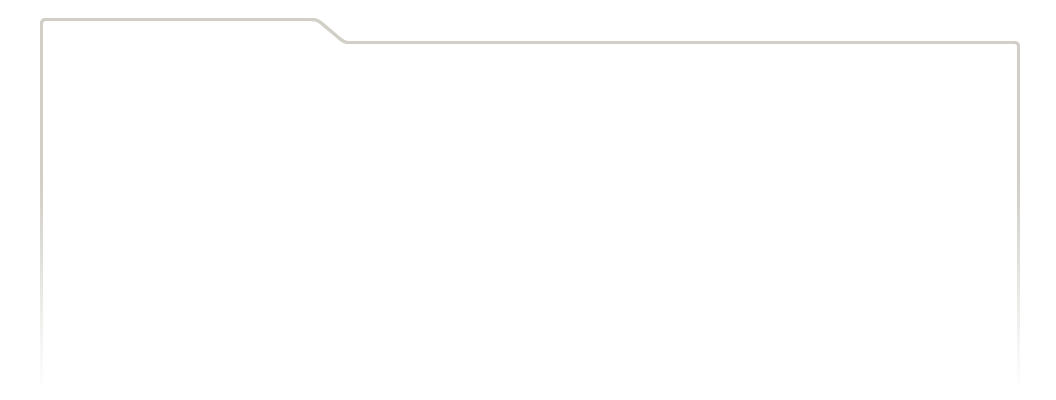
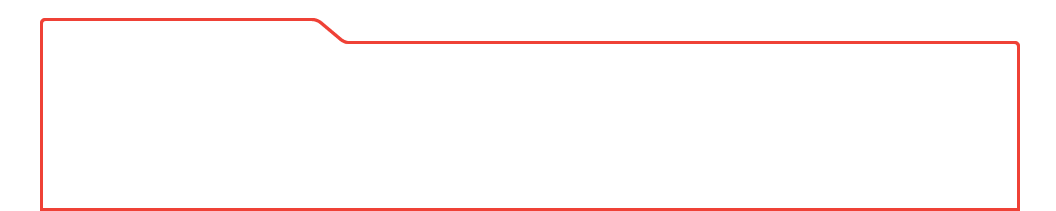
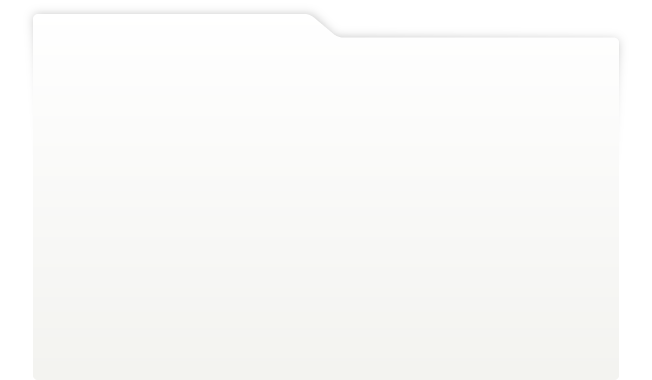
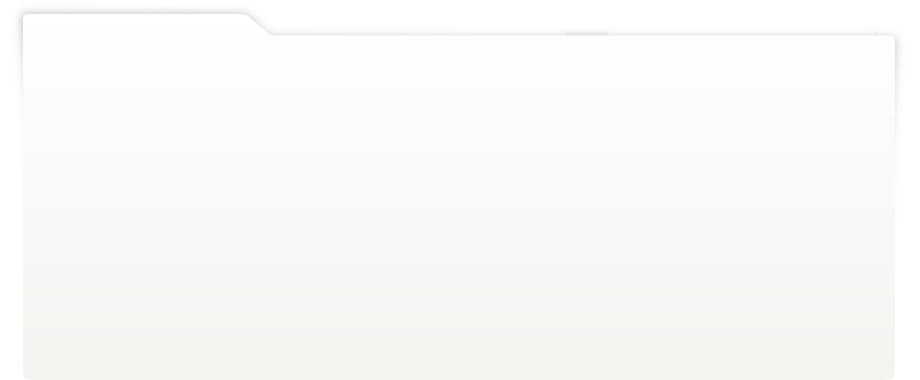
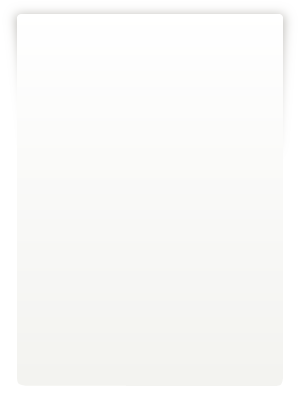
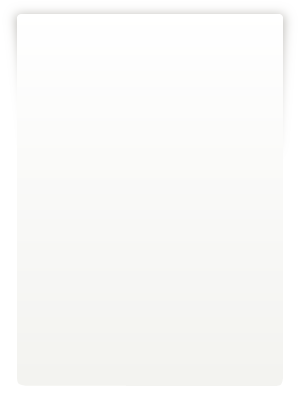
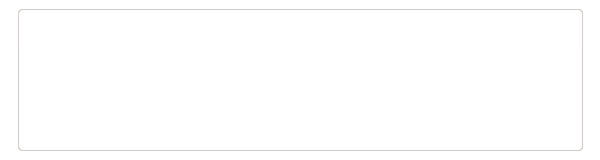
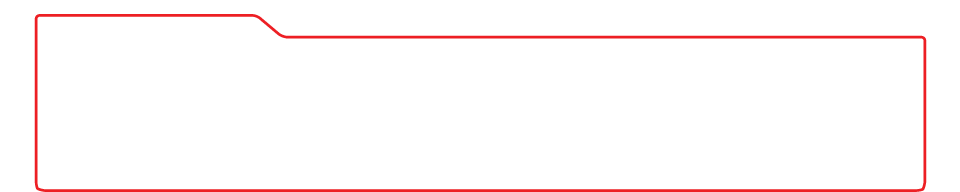
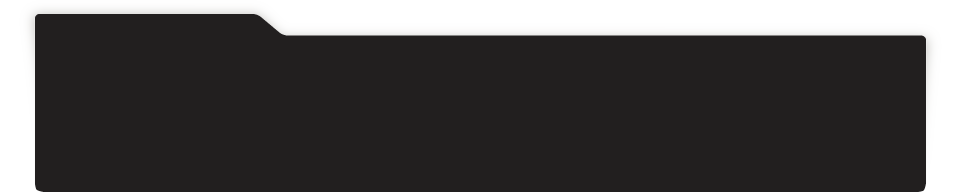
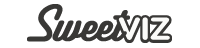
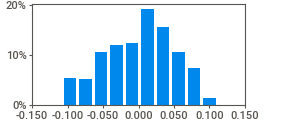
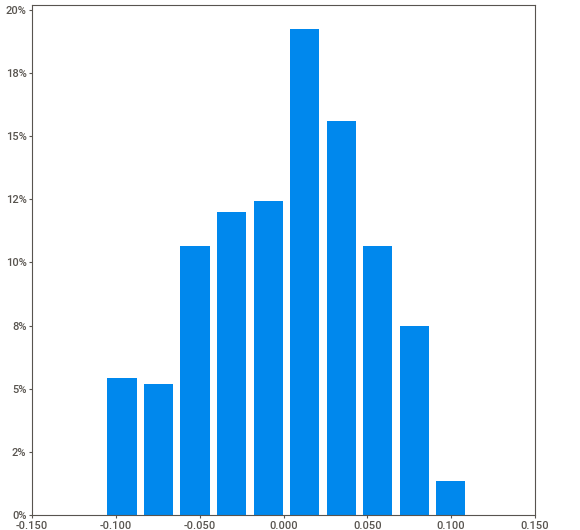
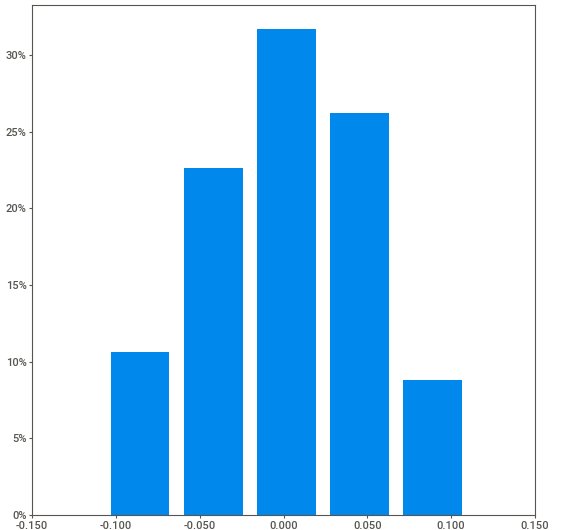
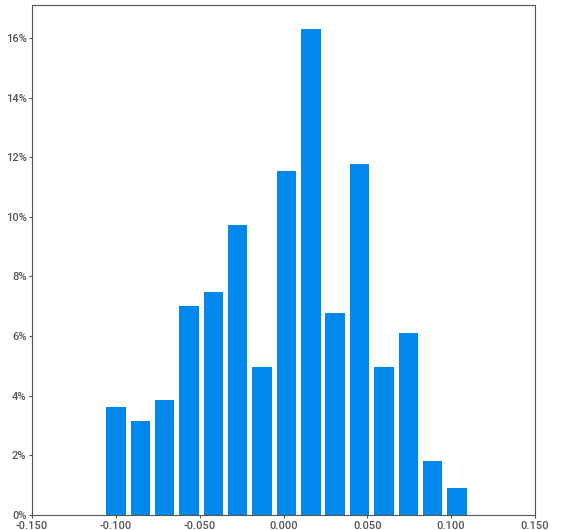
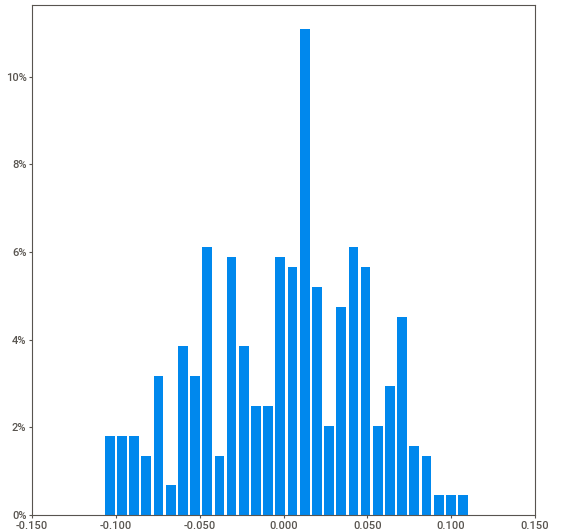
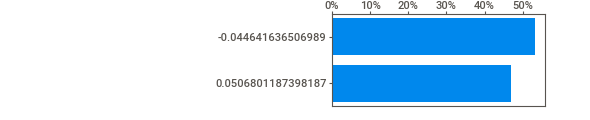
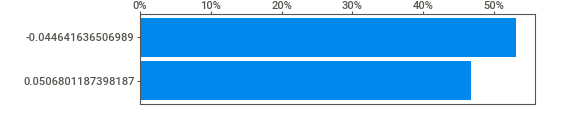
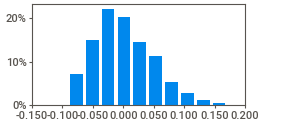
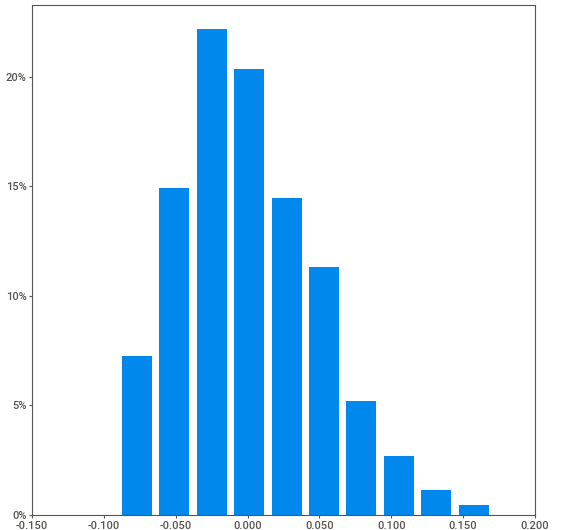
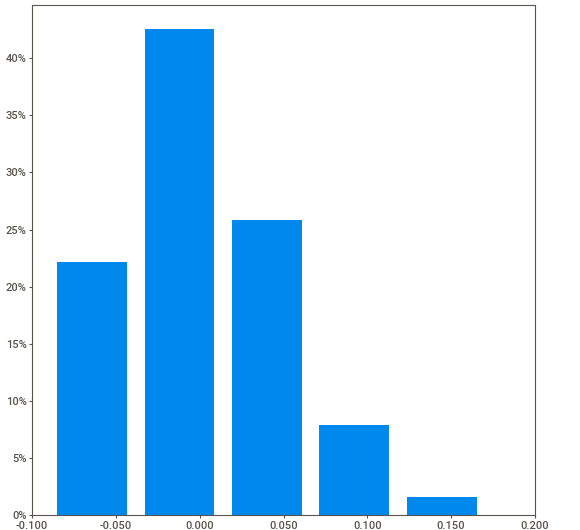
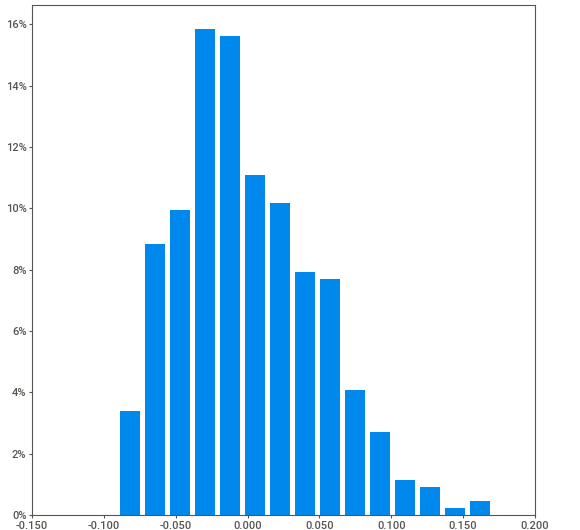
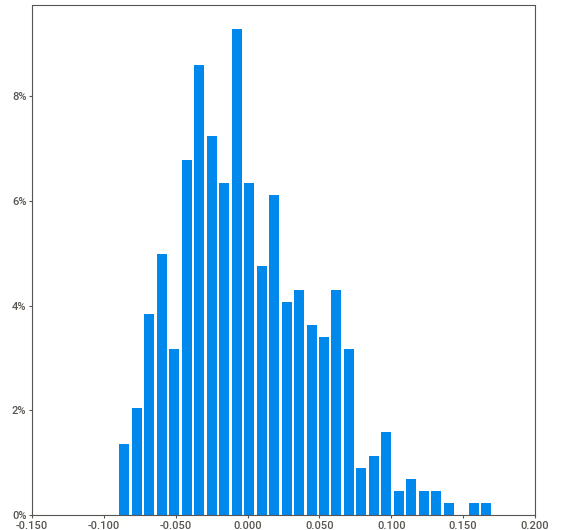
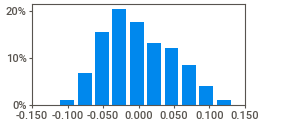
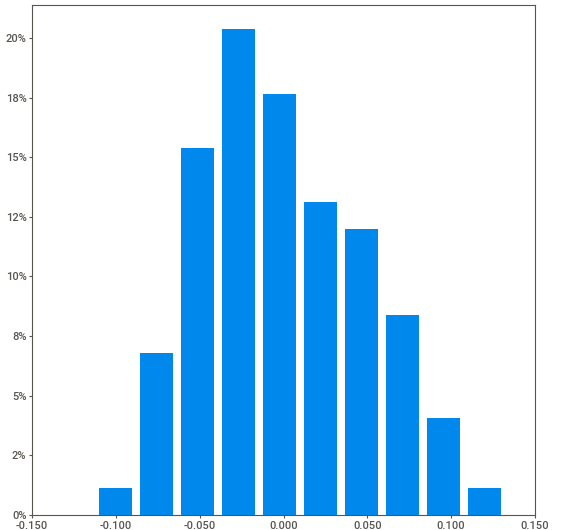
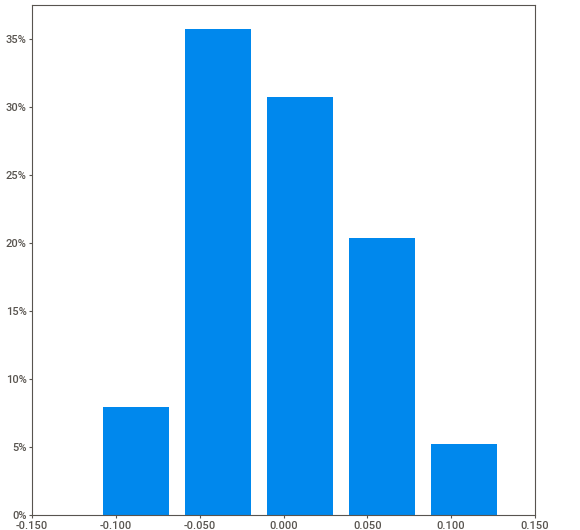
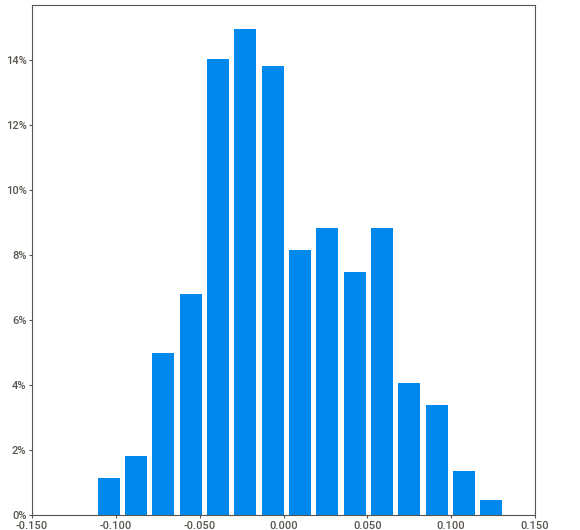
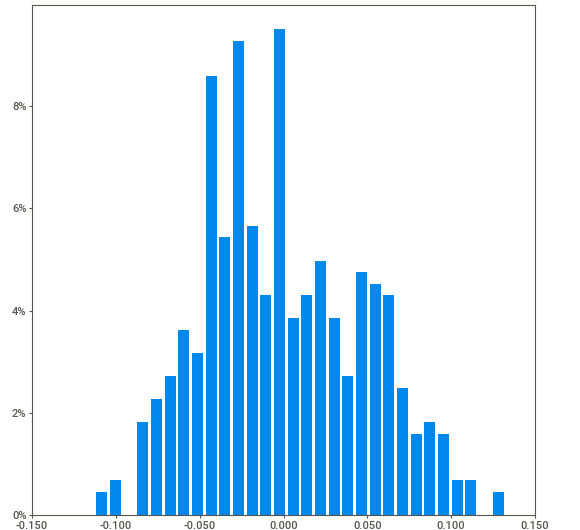
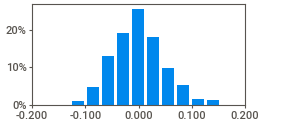
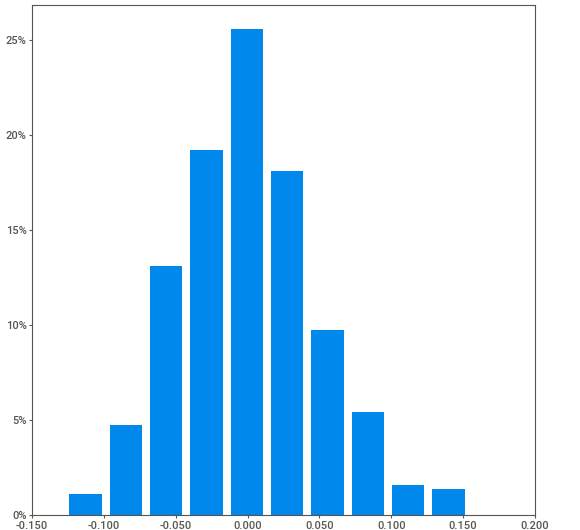
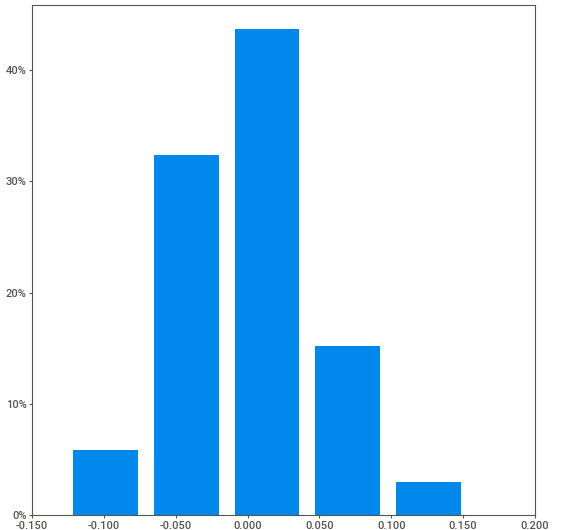
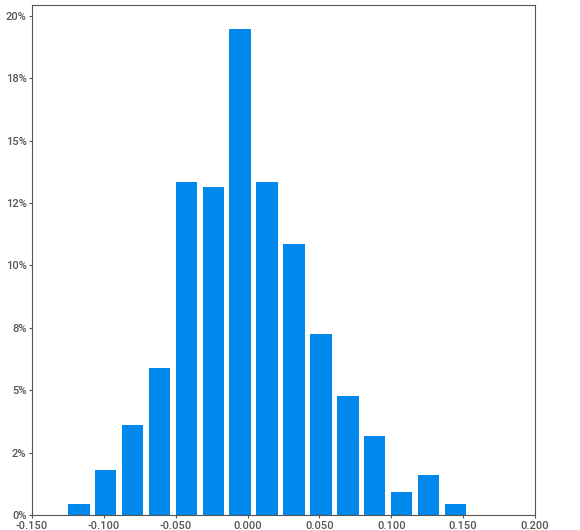
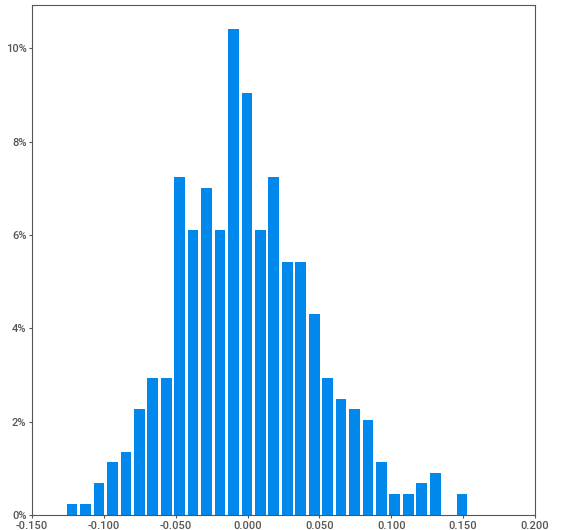
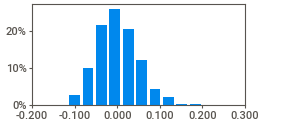
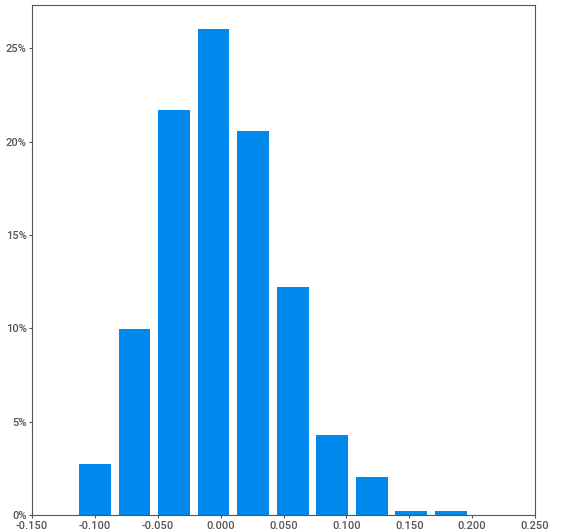
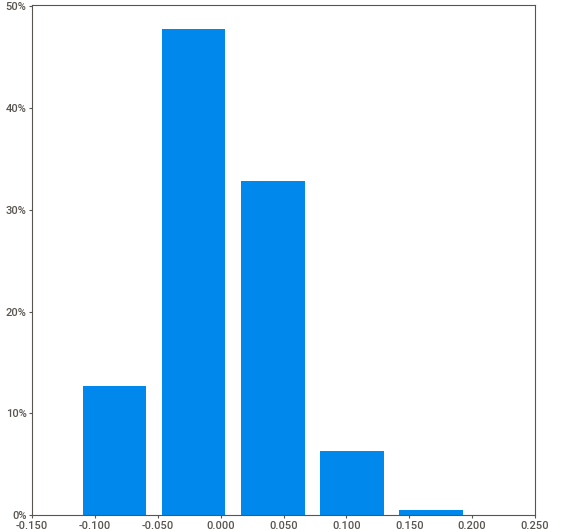
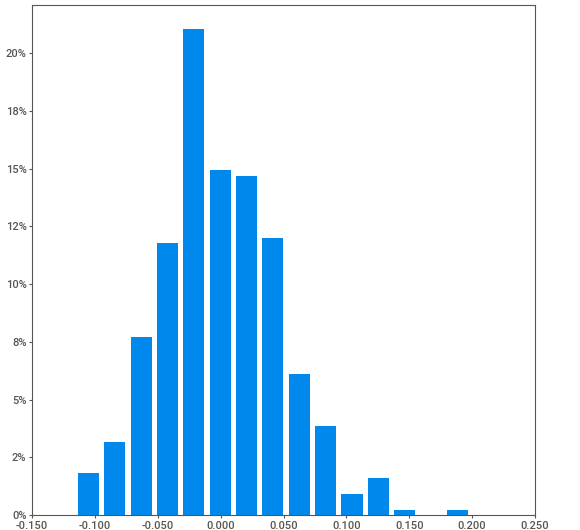
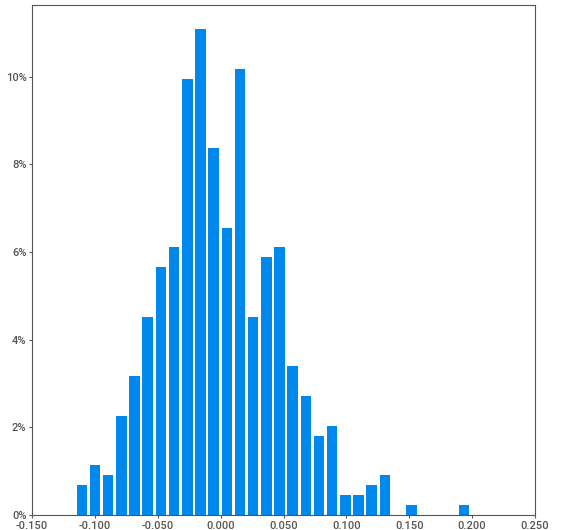
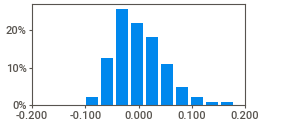
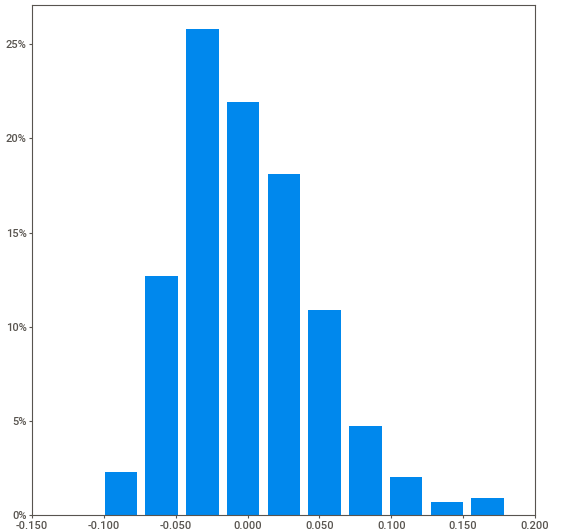
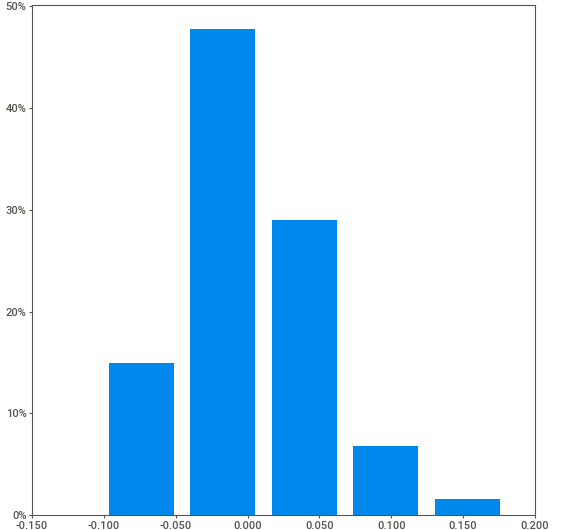
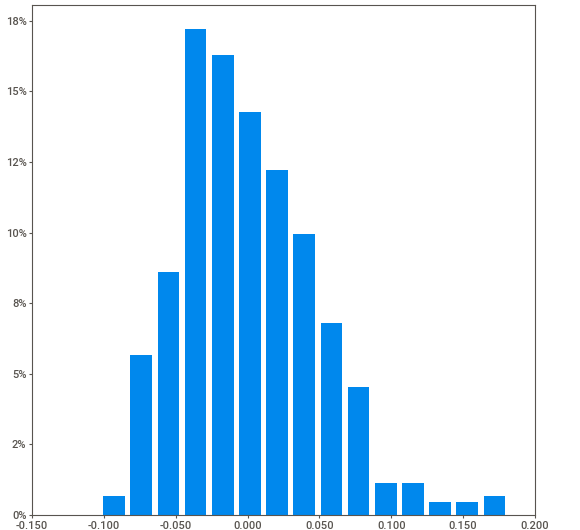
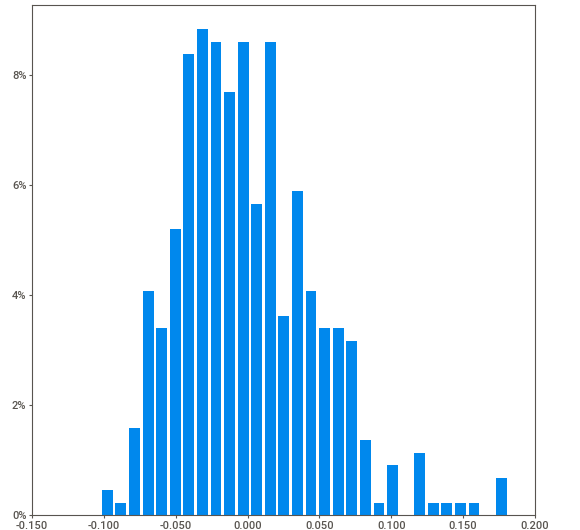
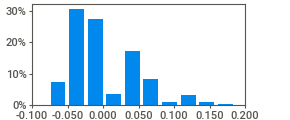
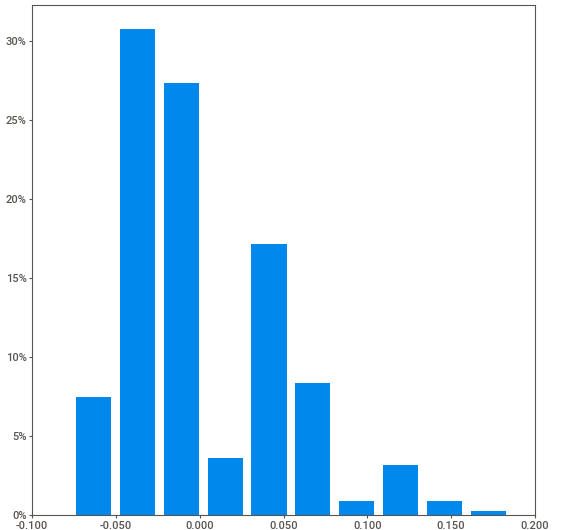
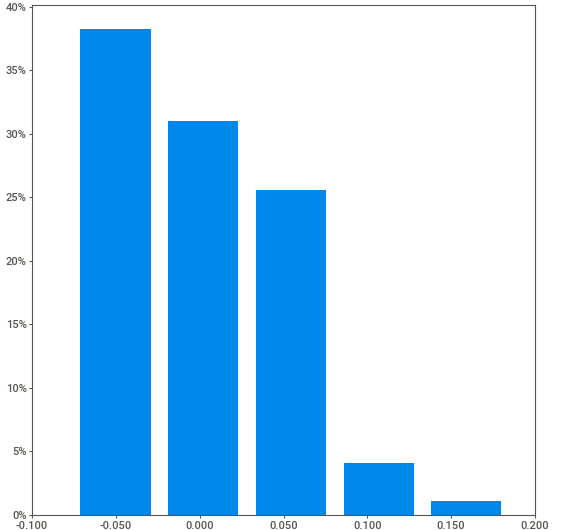
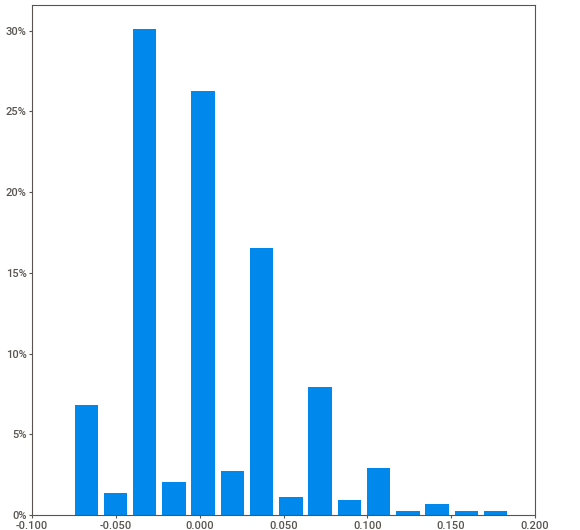
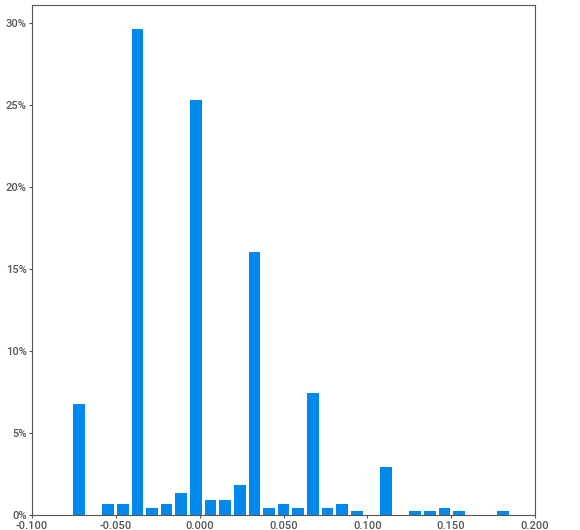
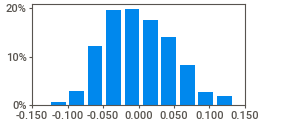
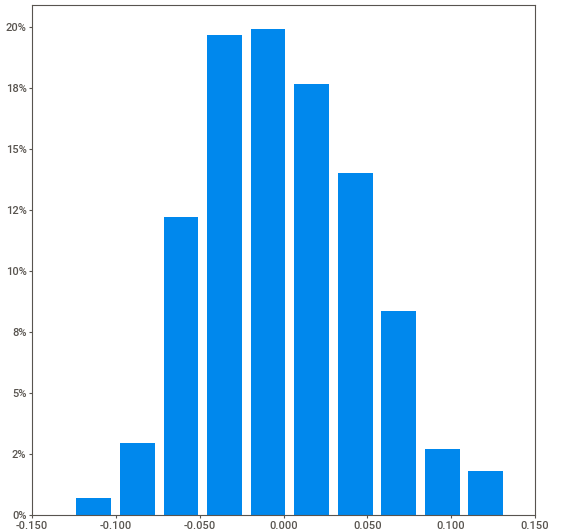
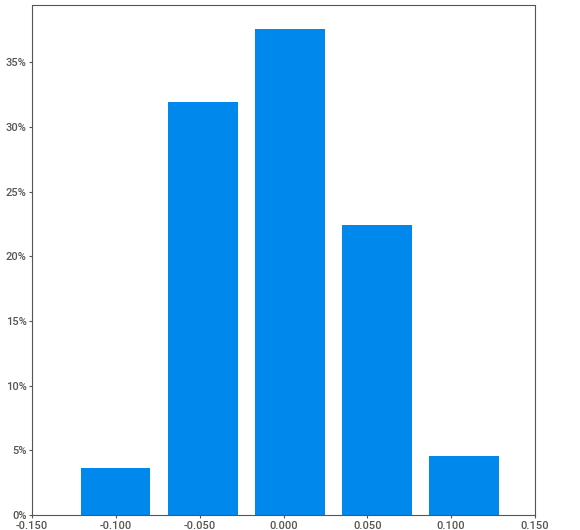
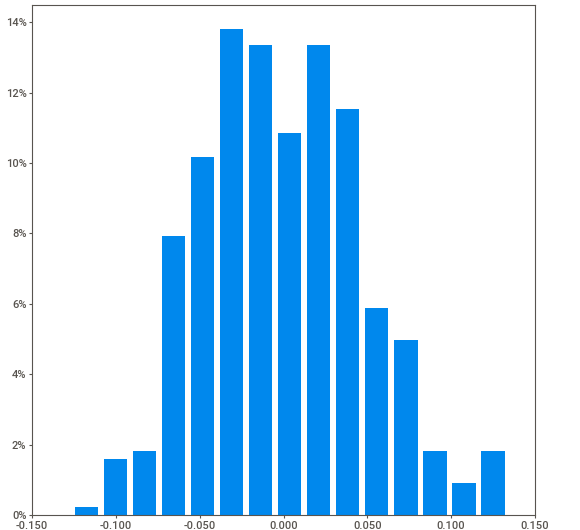
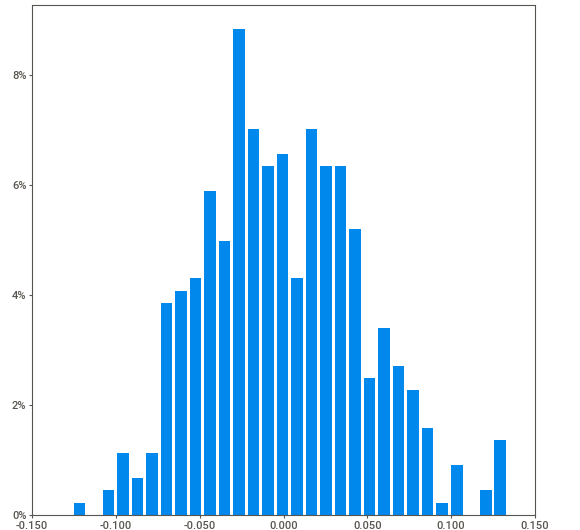
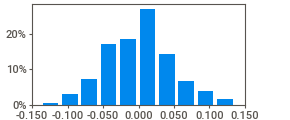
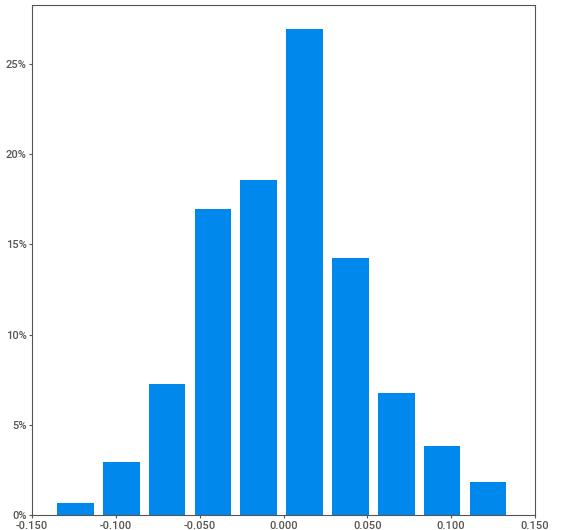
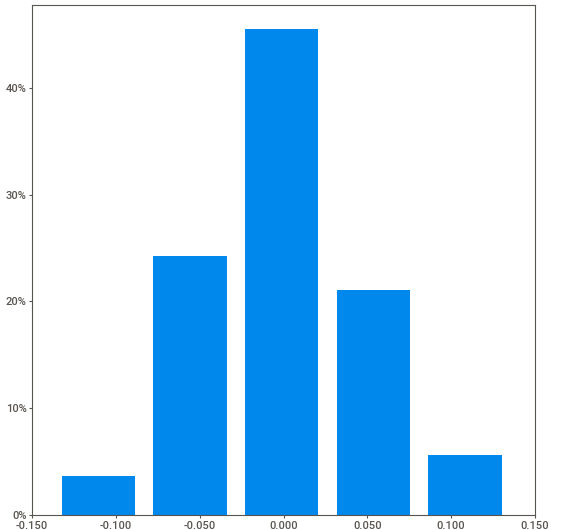
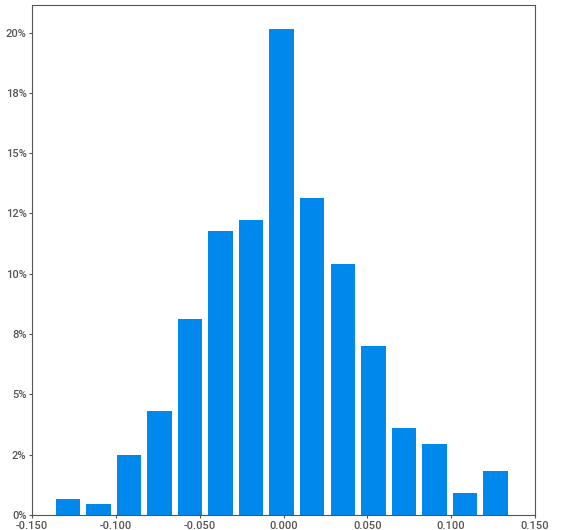
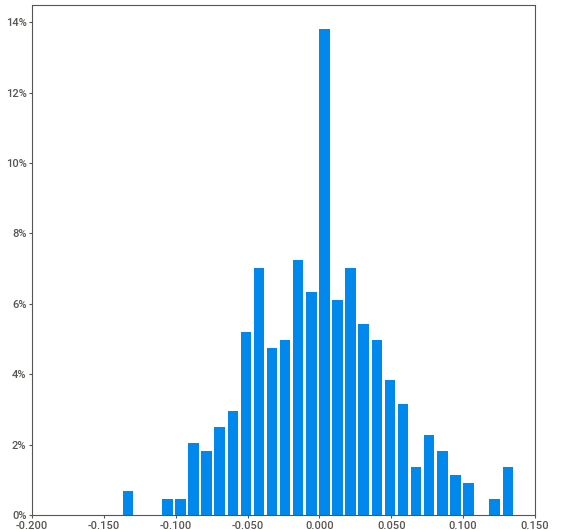
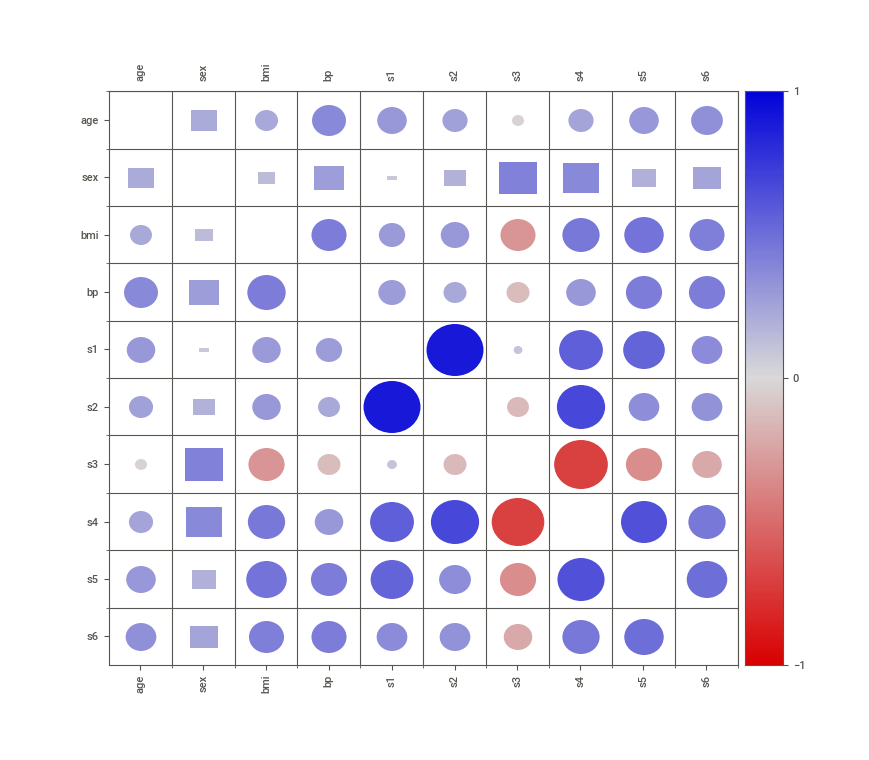
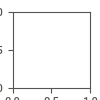

In [59]:
diabetes_report.show_notebook()

In [60]:
sex_categorical = pd.get_dummies(diabetes_data.sex)
sex_categorical_columns = sex_categorical.columns
sex_categorical = sex_categorical.rename({sex_categorical_columns[0]: "0", sex_categorical_columns[1]: "1"}, axis = 1)
sex_categorical

,0,1
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
437,0,1
438,0,1
439,0,1
440,1,0


In [61]:
diabetes_data["0"] = sex_categorical["0"]
diabetes_data["1"] = sex_categorical["1"]
diabetes_data = diabetes_data.drop(columns = ["sex"])
diabetes_data.head(5)

,age,bmi,bp,s1,s2,s3,s4,s5,s6,0,1
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,0,1
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,1,0
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,0,1
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,1,0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,1,0


Our data looks good now, we will now impliment an sklearn MLP regressor and see how it predicts diabetes progression.

In [62]:
diabetes_train, diabetes_test = model_selection.train_test_split(diabetes_data, test_size = .3, train_size = .7)
diabetes_target_train, diabetes_target_test = model_selection.train_test_split(diabetes_target, test_size= .3, train_size= .7)

In [63]:
perceptron_regressor = neural_network.MLPRegressor(hidden_layer_sizes= (50,50,50), max_iter = 10000, activation = "relu", random_state=0)
perceptron_model = perceptron_regressor.fit(diabetes_train, diabetes_target_train)

In [64]:
perceptron_predictions = perceptron_model.predict(diabetes_test)

In [65]:
def plotPredictions(predictions, true_values):
    plt.figure()
    plt.plot(predictions, true_values, '.')
    plt.plot(true_values, true_values)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.grid(alpha = .3)
    plt.show()
    

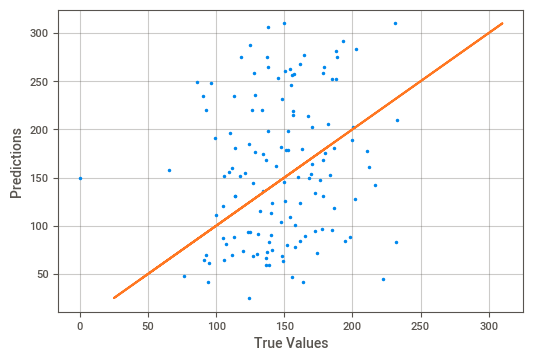

In [66]:
plotPredictions(perceptron_predictions, diabetes_target_test)

In [67]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(perceptron_predictions, diabetes_target_test)))

RMSE:  77.92618846348867


## Part 2: Implement a Keras Classifier
o Given the prepared Titanic dataset from Assignment 2, implement a Keras
sequential classifier with relu activation functions.

In [68]:
titanic_train = pd.read_csv("titanic_train.csv")
titanic_test = pd.read_csv("titanic_test.csv")
titanic_target_test = pd.read_csv("titanic_test_target.csv")

Although tensorflow plays much more nicely with incomplete data sets, we will still go through the process of data cleaning and exploritory data analysis

In [69]:
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [71]:
titanic_target_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [72]:
feature_columns = titanic_test.columns

In [73]:
for column in feature_columns:
    num_missing_data = sum(titanic_train[column].isna())
    print(column, num_missing_data)

PassengerId 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


In [74]:
for column in feature_columns:
    num_missing_data = sum(titanic_test[column].isna())
    print(column, num_missing_data)

PassengerId 0
Pclass 0
Name 0
Sex 0
Age 86
SibSp 0
Parch 0
Ticket 0
Fare 1
Cabin 327
Embarked 0


Although the data came as pre-split, it will be easier to join these data sets, clean them, and then re-split.

In [75]:
titanic_test = titanic_test.join(titanic_target_test.Survived)

In [76]:
titanic_data = pd.concat([titanic_train, titanic_test], axis = 0)
titanic_data = titanic_data.reset_index()
titanic_data = titanic_data.set_index(["PassengerId"])

In [77]:
titanic_report = sweetviz.DataframeReport(titanic_data)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



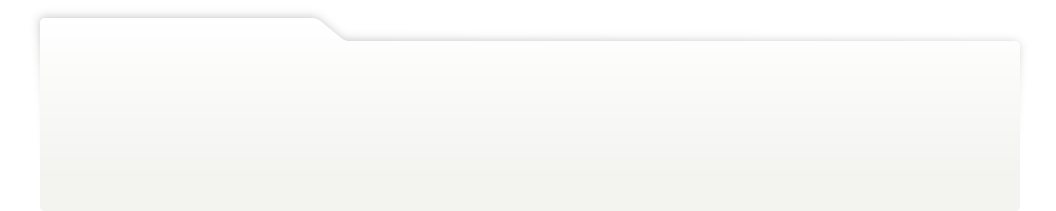
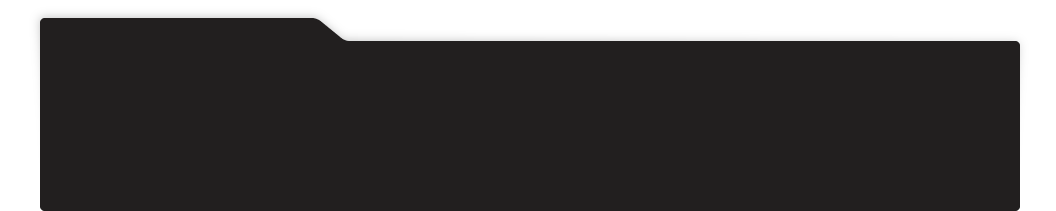
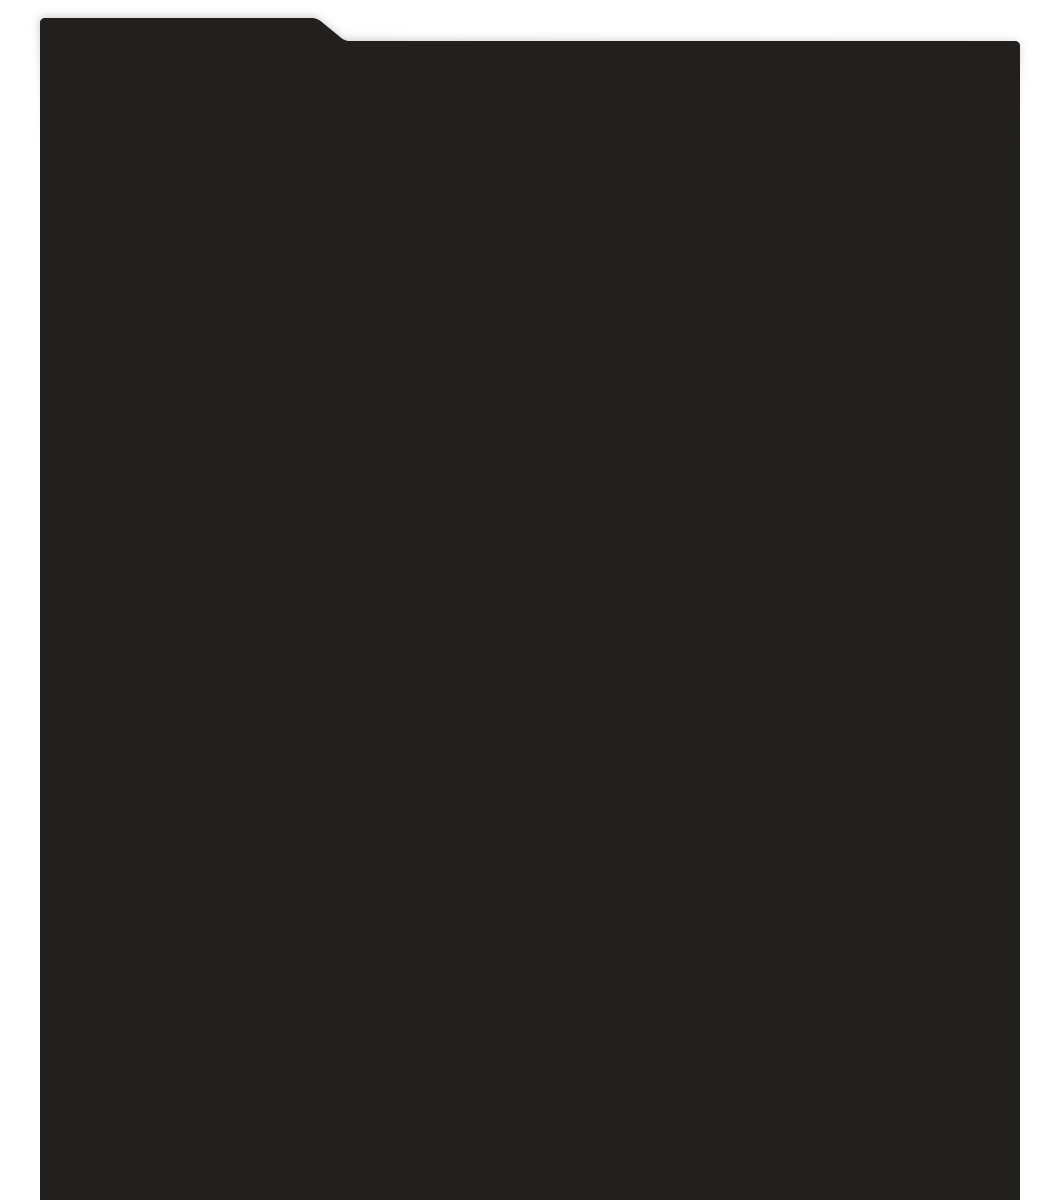
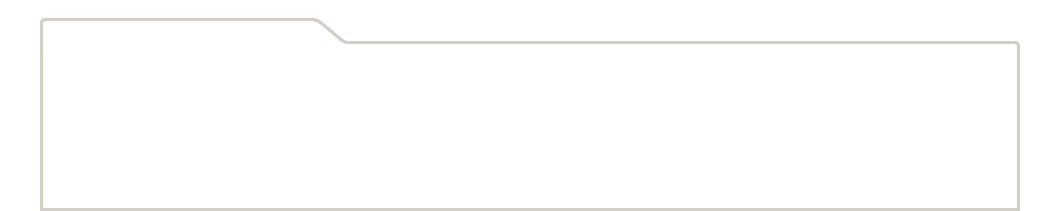
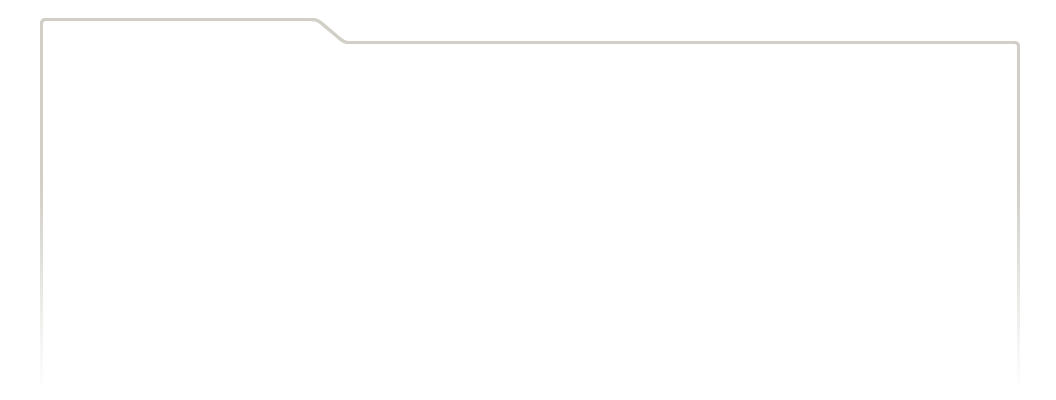
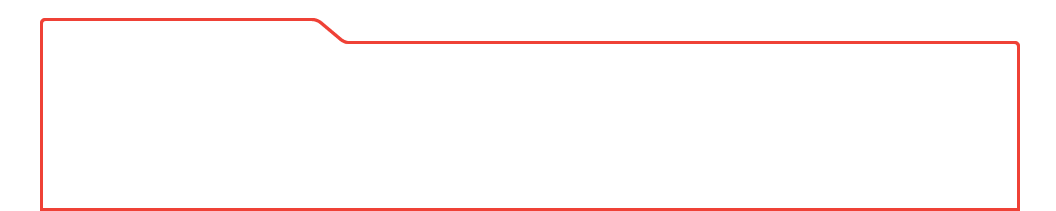
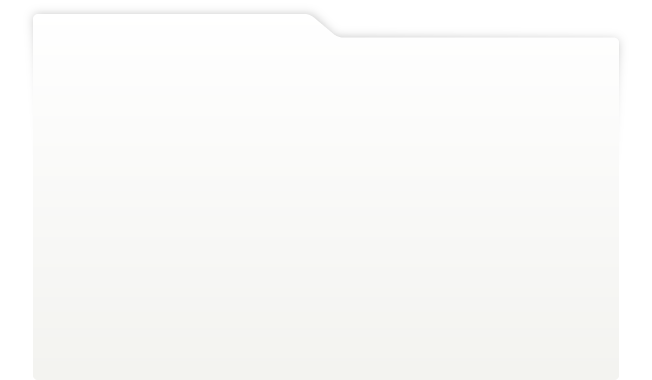
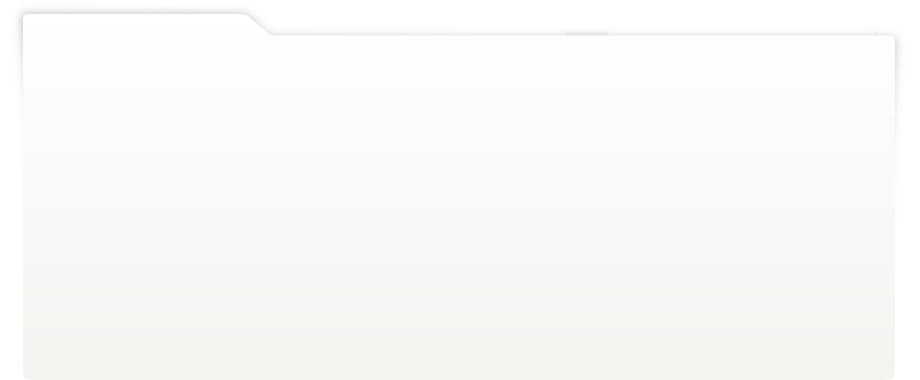
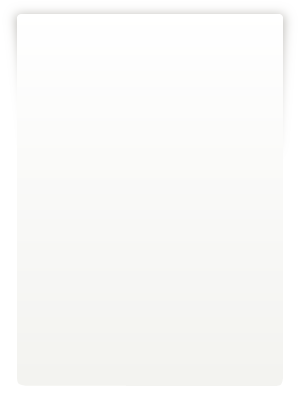
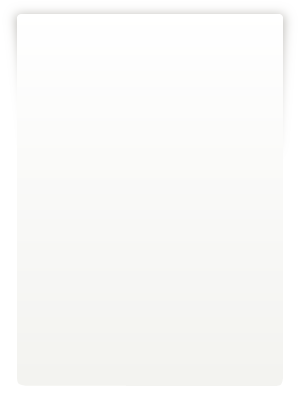
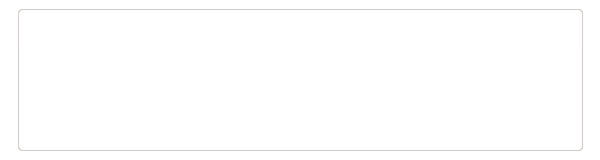
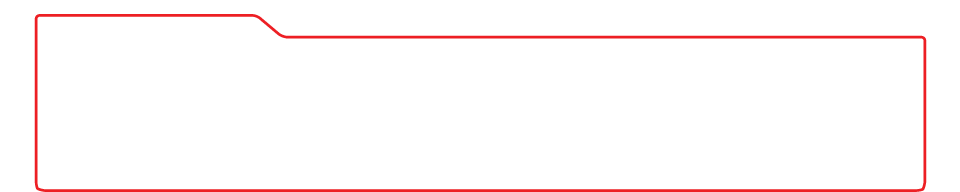
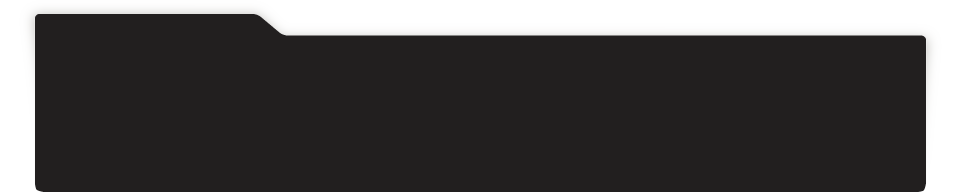
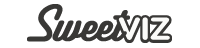
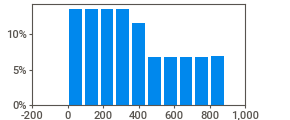
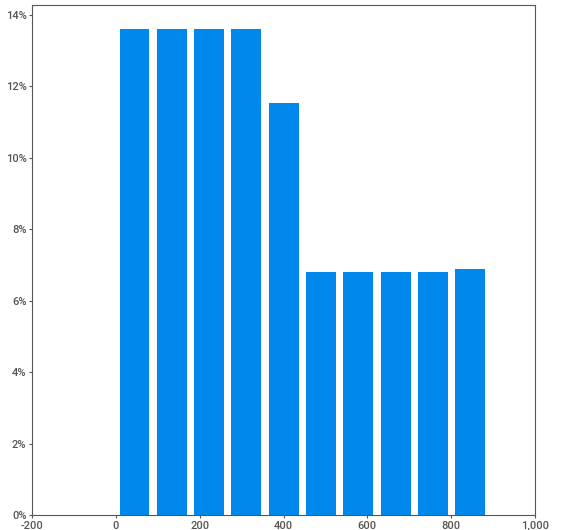
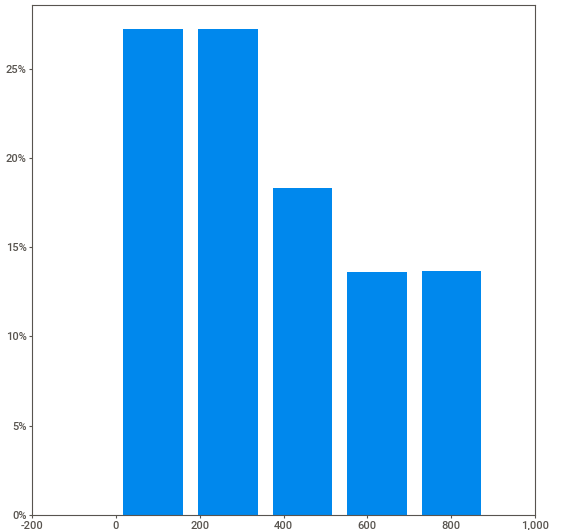
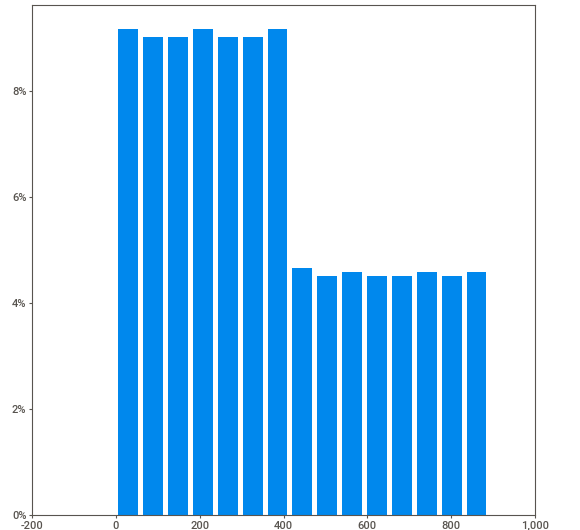
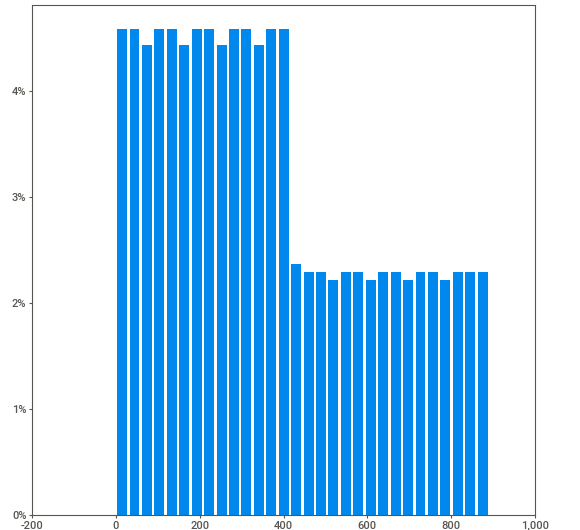
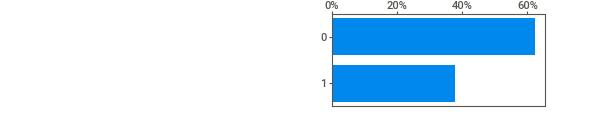
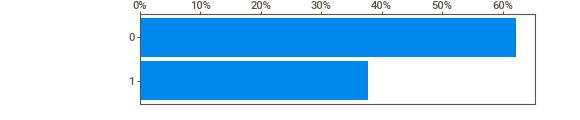
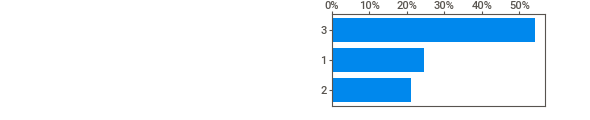
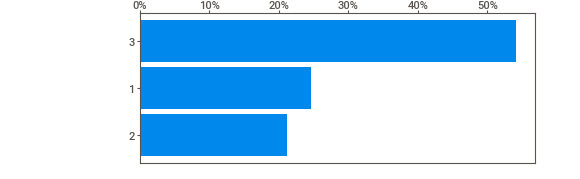
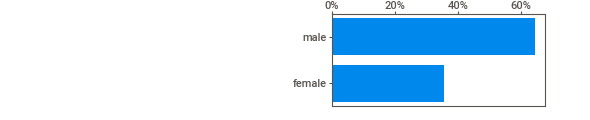
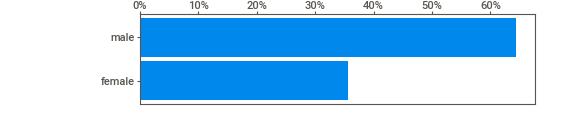
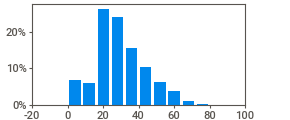
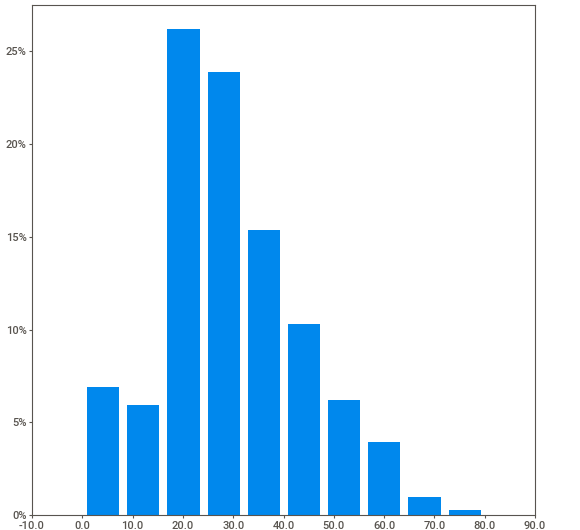
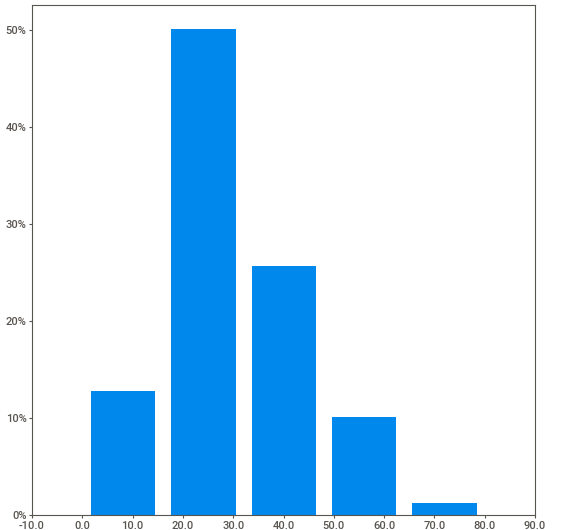
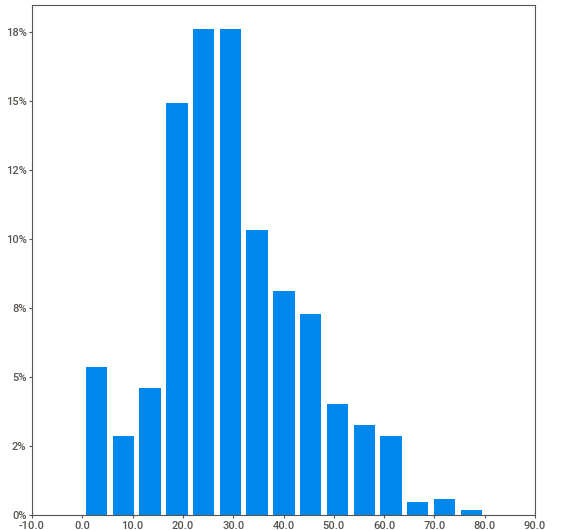
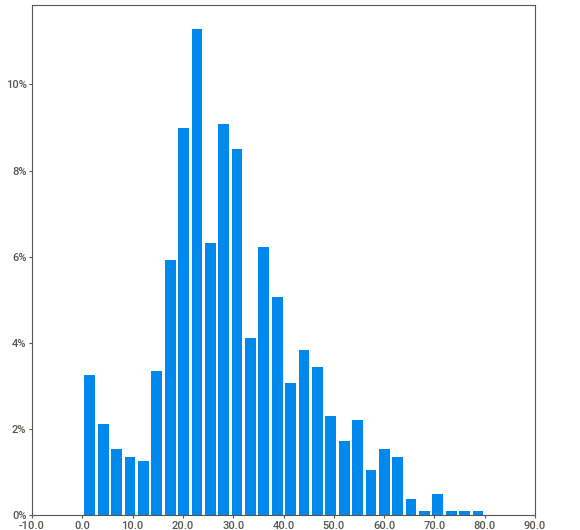
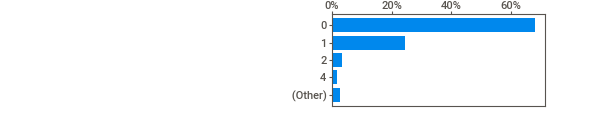
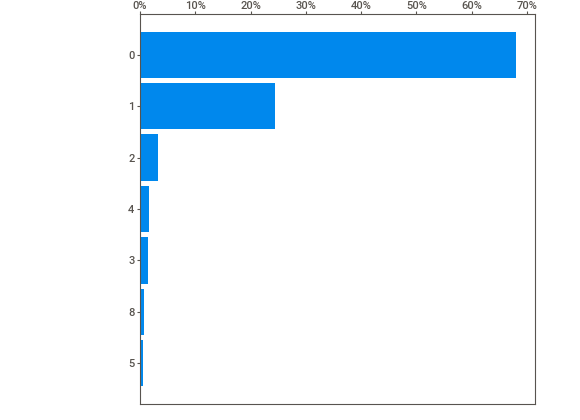
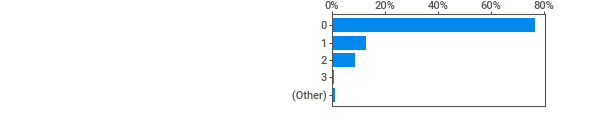
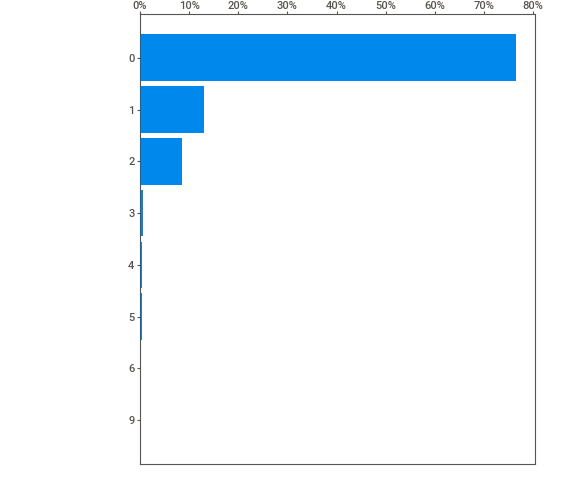
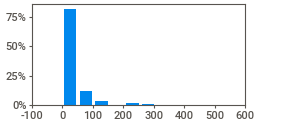
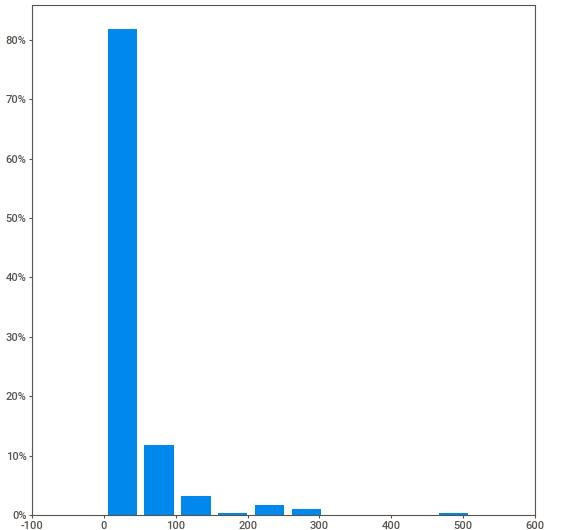
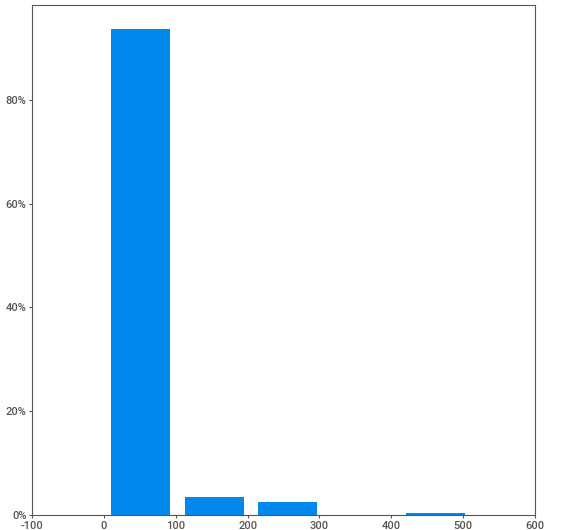
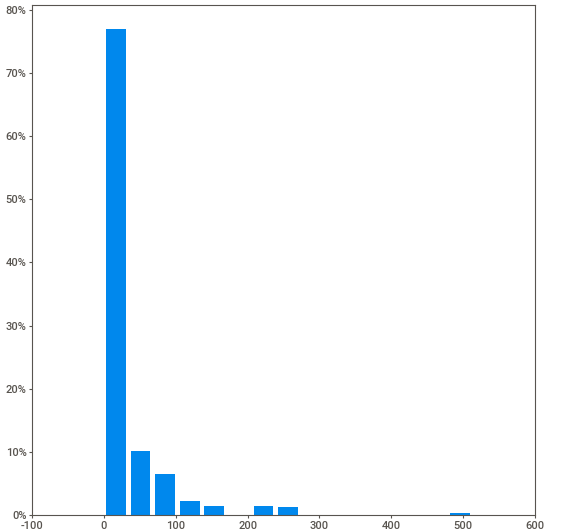
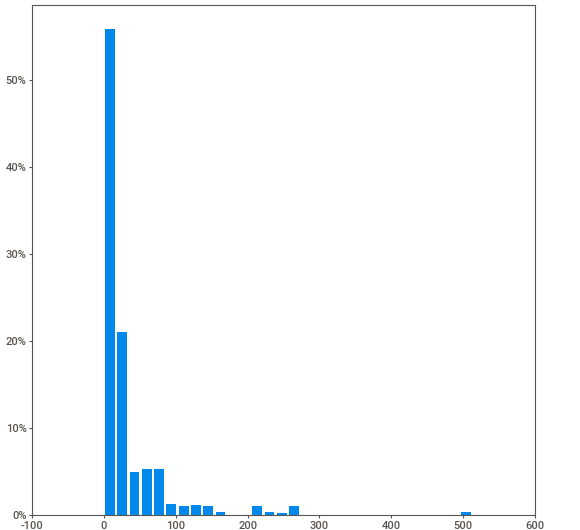
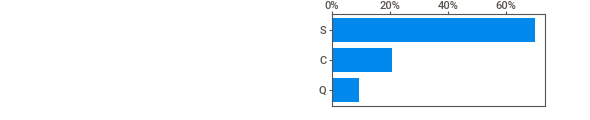
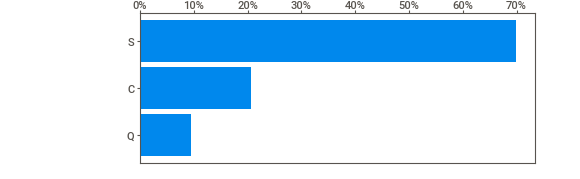
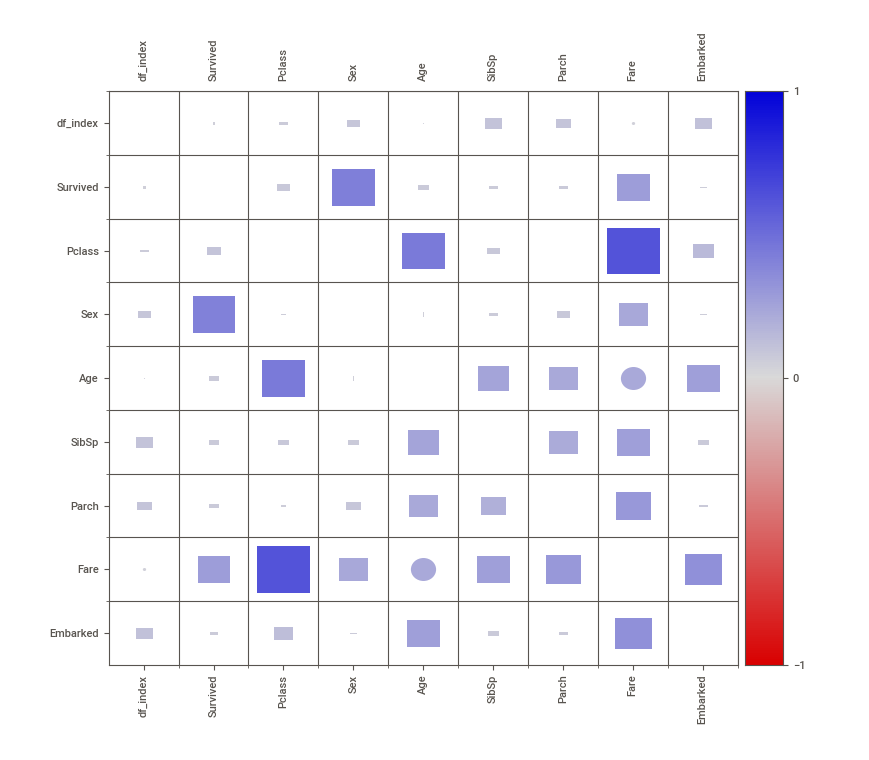
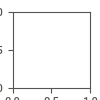

In [78]:
titanic_report.show_notebook()

In [79]:
titanic_data = titanic_data.drop(columns = ["index", "Name", "Ticket", "Cabin"])

We're missing 70 percent of the cabin data so we'll remove that column and we are missing 20 percent of the age column.  We have a stdev of 14 years for age so it would be reasonable to inpute the median age for the missing values.

In [80]:
median_age = np.median(titanic_data.Age.dropna())
print(median_age)

28.0


In [81]:
titanic_data = titanic_data.fillna(median_age)

We'll add in one hot encoding for our data frame's categorical variables

In [82]:
for column in ["Sex", "Pclass", "Parch", "SibSp","Embarked"]:
    one_hot_encoding_df = pd.get_dummies(titanic_data[column],prefix = column)
    
    titanic_data = titanic_data.join(one_hot_encoding_df)
    titanic_data = titanic_data.drop(columns = [column])

titanic_data

,Survived,Age,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Parch_0,Parch_1,...,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_28.0,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,22.0,7.2500,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
2,1,38.0,71.2833,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,1,26.0,7.9250,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,35.0,53.1000,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
5,0,35.0,8.0500,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,28.0,8.0500,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1306,1,39.0,108.9000,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1307,0,38.5,7.2500,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [83]:
titanic_train, titanic_test = model_selection.train_test_split(titanic_data, train_size = .7, test_size = .3)

titanic_target_train = titanic_train["Survived"]
titanic_target_test = titanic_test["Survived"]

titanic_train = titanic_train.drop(columns = ["Survived"])
titanic_test = titanic_test.drop(columns = ["Survived"])

In [84]:
titanic_train.shape

(916, 26)

We're finally done with the data processing, let's set up our neural network now

In [85]:
titanic_neural_network = keras.Sequential(
    [
        layers.InputLayer(26),
        layers.Dense(5, activation = "relu"),
        layers.Dense(5, activation = "relu"),
        layers.Dense(1, activation = "sigmoid")
    ]
)

In [86]:
titanic_neural_network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [87]:
titanic_neural_network.fit(titanic_train, titanic_target_train)

29/29 [==============================] - 0s 1ms/step - loss: 2.4071 - accuracy: 0.3810


In [88]:
titanic_probabilities = titanic_neural_network.predict(titanic_test)

In [89]:
titanic_predictions = titanic_probabilities >= .5
titanic_predictions[0:5]

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [90]:
titanic_target_test[1:5]

PassengerId
595    0
699    0
845    0
458    1
Name: Survived, dtype: int64

In [91]:
titanic_true_values = titanic_target_test == 1
titanic_true_values

PassengerId
1102    False
595     False
699     False
845     False
458      True
        ...  
544      True
246     False
225      True
1268     True
708      True
Name: Survived, Length: 393, dtype: bool

In [92]:
titanic_confusion_matrix = metrics.confusion_matrix(titanic_true_values, titanic_predictions)

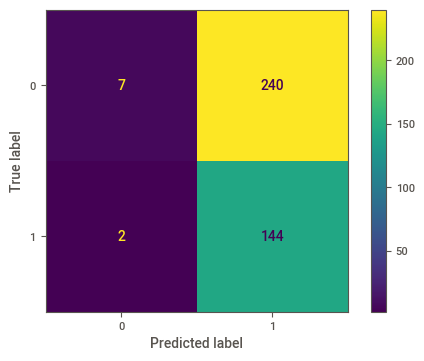

In [93]:
titanic_confusion_matrix_plot = metrics.ConfusionMatrixDisplay(titanic_confusion_matrix)
titanic_confusion_matrix_plot.plot()
plt.show()

Here we can see that our model has a good time predicting failures but a bad time predicting survival.  

## Part 3: Implement a Keras Regressor
o Given the prepared bike-share dataset from Assignment 3, implement a
Keras sequential regressor with relu activation functions.

In [94]:
bike_data = pd.read_csv("day.csv", index_col=0)
bike_data = bike_data.drop(columns = ["dteday"])
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,
1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [95]:
categorical_columns = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

for column in categorical_columns:
    one_hot_columns = pd.get_dummies(bike_data[column], prefix = column)
    bike_data = bike_data.join(one_hot_columns)
    bike_data = bike_data.drop(columns = [column])

bike_data.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
1,0.344167,0.363625,0.805833,0.160446,331,654,985,1,0,0,...,0,0,0,0,1,1,0,0,1,0
2,0.363478,0.353739,0.696087,0.248539,131,670,801,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,0,0,...,1,0,0,0,0,0,1,1,0,0
5,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,0,0,...,0,1,0,0,0,0,1,1,0,0


In [96]:
bike_target = bike_data["cnt"]
bike_target_train, bike_target_test = model_selection.train_test_split(bike_target)


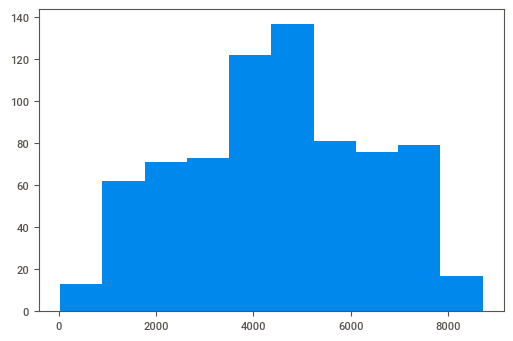

In [97]:
plt.hist(bike_target)
plt.show()

In [98]:
bike_data = bike_data.drop(columns = ["cnt"])

In [99]:
bike_train, bike_test = model_selection.train_test_split(bike_data)

In [100]:
bike_neural_regressor = keras.Sequential(
    [
        layers.Dense(100, activation= "relu"),
        layers.Dense(100, activation = "relu"),
        layers.Dense(100, activation = "relu"),
        layers.Dense(1)
    ]
)

In [101]:
bike_neural_regressor.compile(loss = "mean_squared_error", optimizer = "Adam")

In [102]:
bike_neural_regressor.fit(bike_train, bike_target_train)

18/18 [==============================] - 0s 1ms/step - loss: 14799178.0000


In [103]:
bike_predictions = bike_neural_regressor.predict(bike_test)

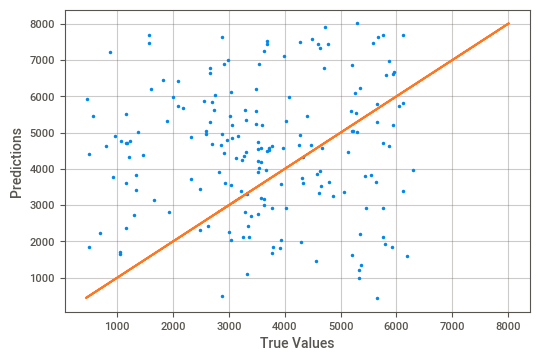

In [104]:
plotPredictions(bike_predictions, bike_target_test)

In [106]:
bike_mse = metrics.mean_squared_error(bike_target_test, bike_predictions)
print(np.sqrt(bike_mse))

2486.7752043295


## Assignment 5, Part 4: Tune Your Keras Regressor
o Tune your Keras regressor from Part 3 by implementing a grid search with
different optimizers

In [126]:
def create_neural_regressor():
    bike_neural_regressor = keras.Sequential(
        [
        layers.Dense(100, activation= "relu"),
        layers.Dense(100, activation = "relu"),
        layers.Dense(100, activation = "relu"),
        layers.Dense(1)
        ]
    )
    bike_neural_regressor.compile(loss = "mean_squared_error", optimizer = "Adam")
    return bike_neural_regressor

In [127]:
bike_model = KerasRegressor(build_fn=create_neural_regressor)

<ipython-input-127-99b37cba277b>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  bike_model = KerasRegressor(build_fn=create_neural_regressor)


In [128]:
bike_hyperparameters = {
    "batch_size": [10,20,30,40,50],
    "epochs" : [1,5,10,15]
}

In [129]:
grid_regressor = model_selection.GridSearchCV(estimator = bike_model, param_grid = bike_hyperparameters)

In [130]:
grid_model = grid_regressor.fit(bike_train, bike_target_train)

11/11 [==============================] - 0s 900us/step - loss: 6439774.0000
Epoch 1/5
44/44 [==============================] - 0s 1ms/step - loss: 8918115.0000
Epoch 2/5
44/44 [==============================] - 0s 1ms/step - loss: 6433010.5000
Epoch 3/5
44/44 [==============================] - 0s 1ms/step - loss: 6379345.0000
Epoch 4/5
44/44 [==============================] - 0s 1ms/step - loss: 6467789.5000
Epoch 5/5
11/11 [==============================] - 0s 1ms/step - loss: 7757534.5000
Epoch 1/5
44/44 [==============================] - 0s 1ms/step - loss: 10015764.0000
Epoch 2/5
44/44 [==============================] - 0s 1ms/step - loss: 6540050.5000
Epoch 3/5
44/44 [==============================] - 0s 1ms/step - loss: 6449394.0000
Epoch 4/5
44/44 [==============================] - 0s 1ms/step - loss: 6430689.0000
Epoch 5/5
11/11 [==============================] - 0s 1000us/step - loss: 7282846.5000
Epoch 1/5
44/44 [==============================] - 0s 1ms/step - loss: 11665495.

In [131]:
grid_predictions = grid_model.predict(bike_test)

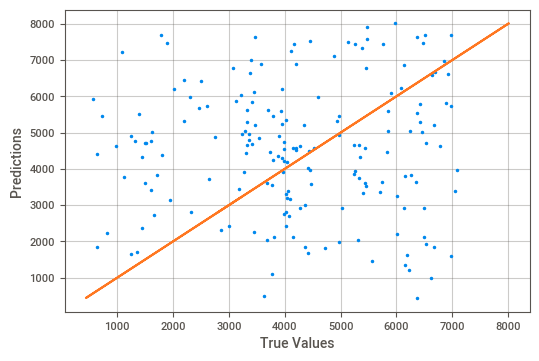

In [132]:
plotPredictions(grid_predictions, bike_target_test)

Overall we can see that while neural networks are very popular and a buzzword in a buisiness setting, for standard machine learning problems, they do not perform much better and in fact perform worse for starndard regression problems.  Neural networks get a lot of attention for image processing and voice processing, but standard regression or classification problems require traditional techneques to get a good fit.  